# Hello Honey, I'm Home!

It is fair to say,  that in a very near future,  as people approach their place of residence,  sensors will be able to detect their presence.  These detecting sensors will be able to use one of many ways of detection that are available today.  They will use web cameras that can read our license numbers, and notify our loved ones about our arrival.  Other sensors will detect our biometrics, and perform face recognition, or iris detection, in order to possibly allow us passage into our homes.  In this chapter we will explore some of the many algorithms that make this technology possible.

## Automatic License Plate Recognition 

There are many algorithms available that perform some kind of automatic license plate recognition. Some of these are very basic, and they combine some aspects and functionalities of the algorithms that we have seen in previous chapters.  Sometimes when we use the tesseract-ocr and applied to certain images,  as we will see, we can have unexpected results. 
License plate recognition involves the photographic capture of  images or video of license plates.  These captures are then processed by some of the algorithms that we have seen in previous chapters.  These algorithms produce an alpha numeric conversion from image data into strings, displayed as a text entry.

These algorithms do the following steps in the recognition of images,


Normalization of Images through the use of techniques that we saw in previous chapters

-Character Isolation and Segmentation
-Vehicle ROI Localization
-License Plates Angle Orientation
-Optical Character Recognition


We will now explore these steps in more detail, and see how we can use the techniques that we went over in previous chapters in the automatic license plate recognition process.


## Contrast Of Images for Easy Identification of Images

We will use the following image of a license plate.  The reason for using this particular license plate, (besides the fact that I have a spare one), is that it contains letters and numeric characters, and it not as straight-forward due to its design.  These traits will become handy as we test our plate recognition algorithms.

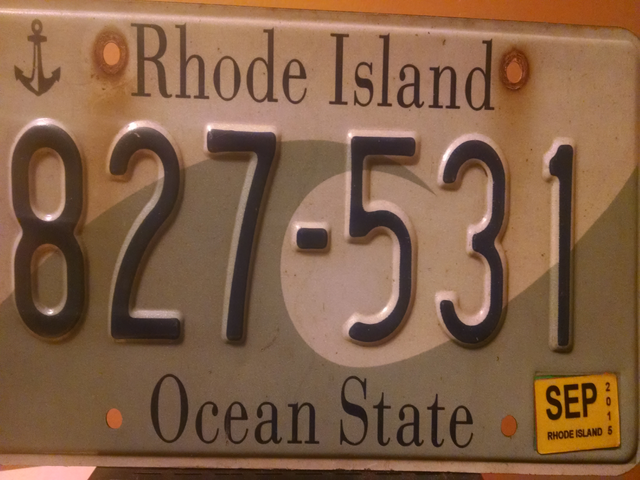

In [1]:
from IPython.display import Image
Image(filename='/home/cesco/Desktop/Desktop/book_entirety/ch5_final/images/B04209_05_01.png')

It is very important to apply preprocessing to the image by increasing contrast, sharpening of the image, blur and noise reduction.  We can use any of the algorithms already used in previous chapters for the preprocessing, like these from the OpenCV Python tutorials page,

In [ ]:
//canny.py

import cv2
import numpy as np

def CannyThreshold(lowThreshold):
    detected_edges = cv2.GaussianBlur(gray,(3,3),0)
    detected_edges = cv2.Canny(detected_edges,lowThreshold,lowThreshold*ratio,apertureSize = kernel_size)
    dst = cv2.bitwise_and(img,img,mask = detected_edges)  # just add some colours to edges from original image.
    cv2.imshow('canny demo',dst)

lowThreshold = 0
max_lowThreshold = 100
ratio = 3
kernel_size = 3
img = cv2.imread('plate.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.namedWindow('canny demo')
cv2.createTrackbar('Min threshold','canny demo',lowThreshold, max_lowThreshold, CannyThreshold)
CannyThreshold(0)  # initialization
if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()

and the Sobel algorithm,

In [ ]:
//sobel.py


import cv2
import numpy as np

scale = 1
delta = 0
ddepth = cv2.CV_16S

img = cv2.imread('plate.png')
img = cv2.GaussianBlur(img,(3,3),0)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Gradient-X
grad_x = cv2.Sobel(gray,ddepth,1,0,ksize = 3, scale = scale, delta = delta,borderType = cv2.BORDER_DEFAULT)

#grad_x = cv2.Scharr(gray,ddepth,1,0)
# Gradient-Y
grad_y = cv2.Sobel(gray,ddepth,0,1,ksize = 3, scale = scale, delta = delta, borderType = cv2.BORDER_DEFAULT)
#grad_y = cv2.Scharr(gray,ddepth,0,1)
abs_grad_x = cv2.convertScaleAbs(grad_x)   # converting back to uint8
abs_grad_y = cv2.convertScaleAbs(grad_y)
dst = cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)
#dst = cv2.add(abs_grad_x,abs_grad_y)


cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


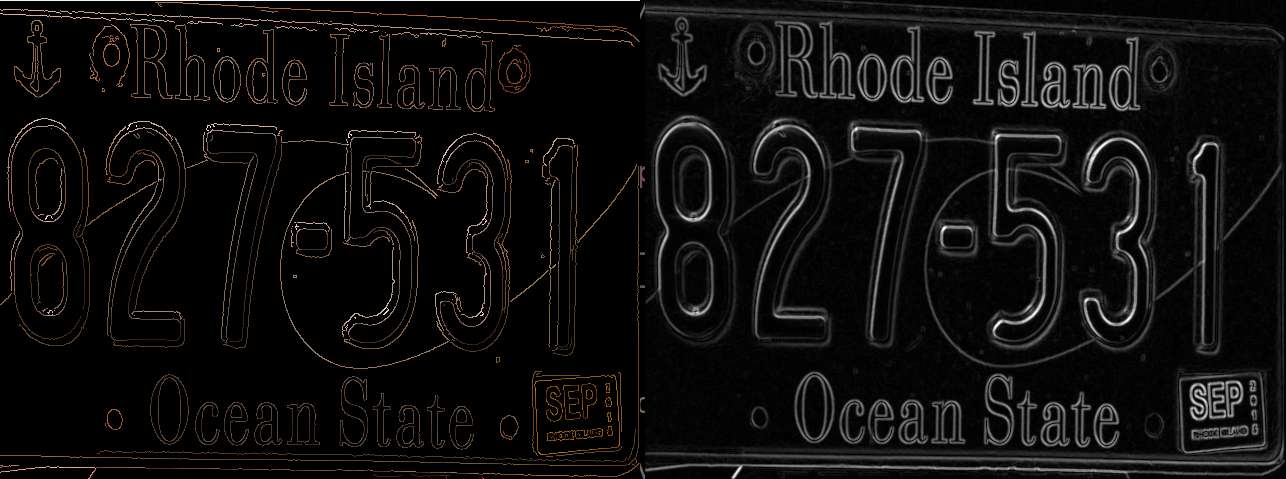

In [2]:
from IPython.display import Image
Image(filename='/home/cesco/Desktop/Desktop/book_entirety/ch5_final/images/B04209_05_02.png')

The image on the left is using the Canny algorithm, and the picture on the right is using the Sobel algorithm.  If you are not happy with the regulating of the contrast and brightness of the captured license plate image with these two algorithms, you can pick mong many others that come with your OpenCV download.  For example I have used an equalization, and a contours finding  program for illustration purposes,


In [ ]:
//contours.py


import cv2
import numpy as np

def thresh_callback(thresh):
    edges = cv2.Canny(blur,thresh,thresh*2)
    drawing = np.zeros(img.shape,np.uint8)     
    contours,hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        color = np.random.randint(0,255,(3)).tolist()  # Select a random color
        cv2.drawContours(drawing,[cnt],0,color,2)
        cv2.imshow('output',drawing)
    cv2.imshow('input',img)

img = cv2.imread('plate.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
cv2.namedWindow('input',cv2.WINDOW_AUTOSIZE)
thresh = 100
max_thresh = 255
cv2.createTrackbar('canny thresh:','input',thresh,max_thresh,thresh_callback)
thresh_callback(thresh)
if cv2.waitKey(0) == 27:
    cv2.destroyAllWindows()

and the equalization program,

In [ ]:
//equalize.py


import cv2
import numpy as np

img = cv2.imread('plate.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
equ = cv2.equalizeHist(gray)    
cv2.imshow('src',gray)
cv2.imshow('equ',equ)
cv2.waitKey(0)
cv2.destroyAllWindows()

that produces the following result,

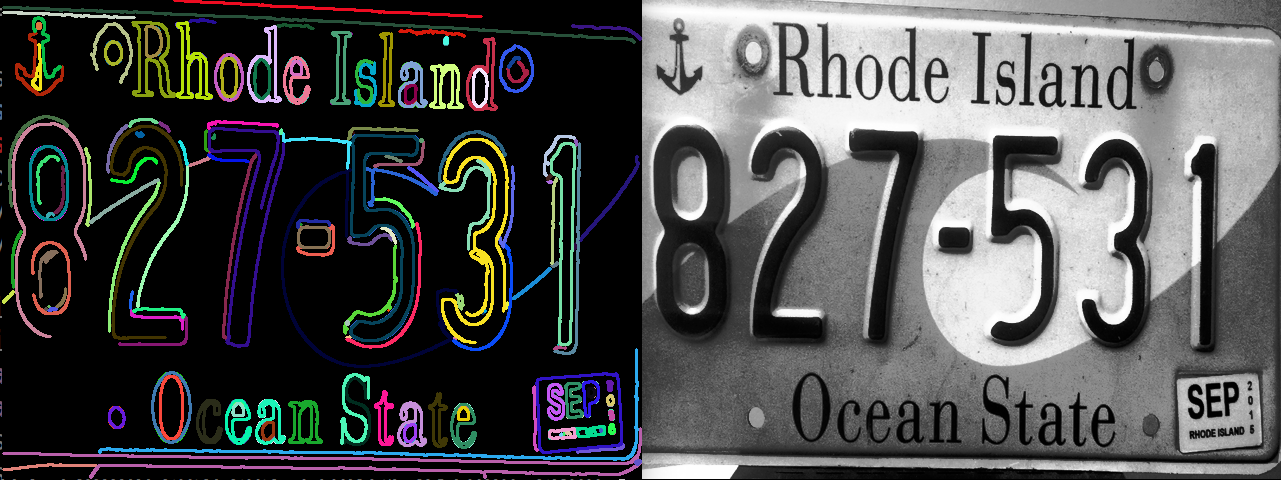

In [7]:
from IPython.display import Image
Image(filename='/home/cesco/Desktop/Desktop/book_entirety/ch5_final/images/ B04209_05_03.png')

## Alpha Numeric Character Segmentation

It is sometimes very helpful as we engage in automatic license plate recognition to cut the  image into segments, so we can isolate and identify each character independently from all other characters,  and in a discrete manner, making it useful for recognition.  

In [ ]:
//segmentation.py

import cv2
import numpy as np
img = cv2.imread('plate.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

filtered = cv2.adaptiveThreshold(gray.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,89,3)

kernel = np.ones((5,5), np.uint8)
open = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
close = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel)

cv2.imshow('img',close)
cv2.waitKey(0)
cv2.destroyAllWindows()

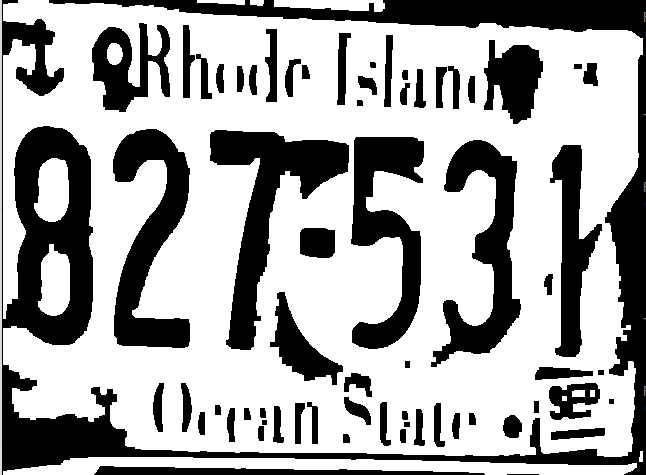

In [4]:
from IPython.display import Image
Image(filename='/home/cesco/Desktop/Desktop/book_entirety/ch5_final/images/B04209_05_04.png')


This is done by the algorithm identifying color, font, and distance differences in order to make the separation.  

In [ ]:
//segmentation2.py


import cv2
import numpy as np


# Load the image
img = cv2.imread('plate.png')

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps
thresh = cv2.dilate(thresh,None,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 2)
# Find the contours
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

# For each contour, find the bounding rectangle and draw it

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)

    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
cv2.imshow('img',img)
cv2.imshow('res',thresh_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

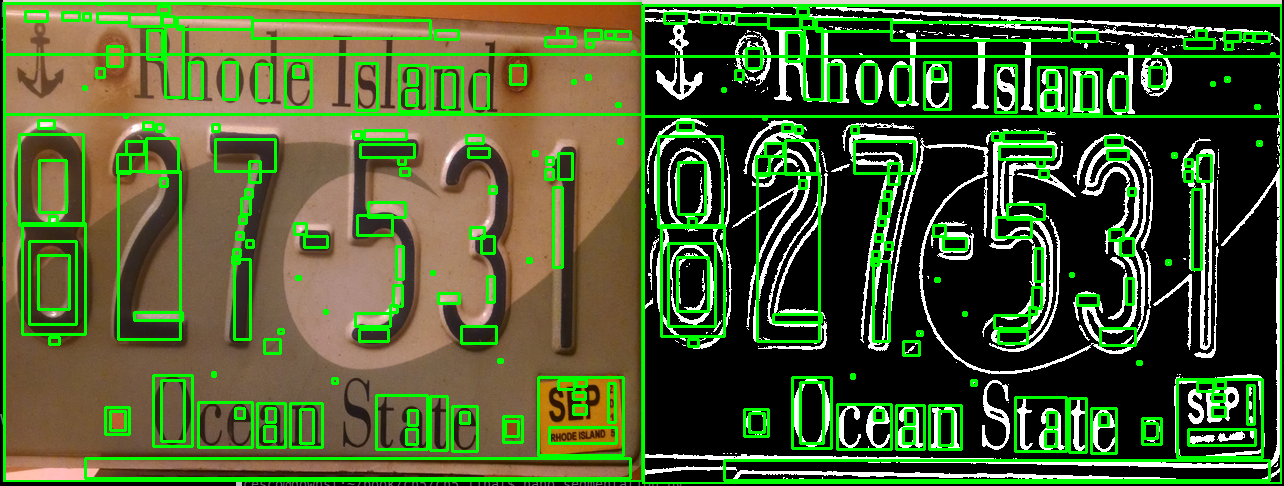

In [6]:
from IPython.display import Image
Image(filename='/home/cesco/Desktop/Desktop/book_entirety/ch5_final/images/B04209_05_05.png')

Angle differences, and how the image is centered, will make a difference and affect the output of the algorithm.  



The following image is more centered and not as skewed, and using the same code we get the following more cleaner image, and more clearly defined segmentation.

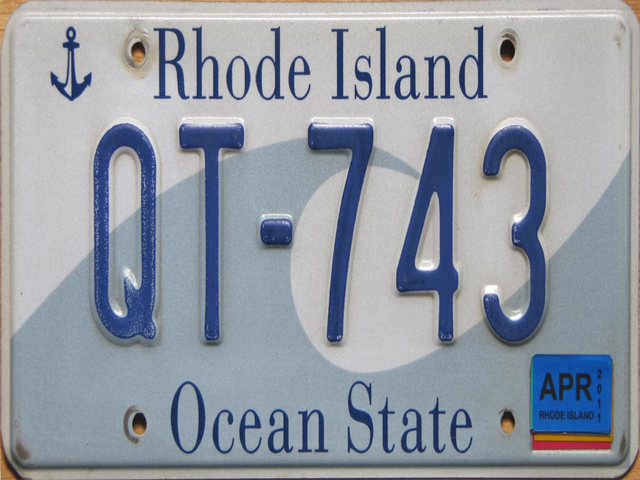

In [7]:
from IPython.display import Image
Image(filename='/home/cesco/Desktop/Desktop/book_entirety/ch5_final/images/B04209_05_06.png')

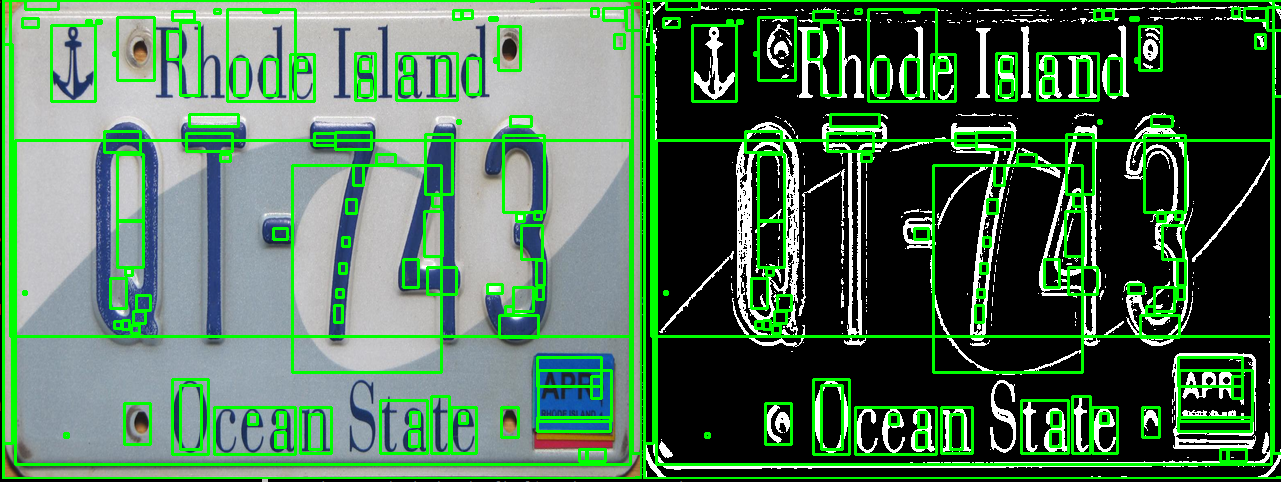

In [8]:
from IPython.display import Image
Image(filename='/home/cesco/Desktop/Desktop/book_entirety/ch5_final/images/B04209_05_07.png')